# Lab 7
### Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def getHist(img):
    Histogram=np.zeros(256)
    imgCopy=np.copy(img)
    for  i in range (imgCopy.shape[0]):
        for  j in range (imgCopy.shape[1]):
            Histogram[(imgCopy[i][j]).astype(int)]=Histogram[(imgCopy[i][j]).astype(int)]+1
    return Histogram

In [3]:
def getThreshold(img):
    histogram = getHist(img)
    levelsCount = len(histogram)
    Tinit=0
    for k in range(levelsCount):
            segma = k * histogram[k]
            Tinit += segma
    pCount=(img.shape[0]*img.shape[1])
    Tinit =np.around(Tinit/pCount)
    Tcurr=int(Tinit)
    Told=Tcurr+1
    while (abs(Told-Tcurr) > 0.1):
        lower = histogram[0:int(Tcurr)]
        upper = histogram[int(Tcurr):]
        cLower = np.sum(lower)
        cUpper = np.sum(upper)
        sLower=0
        sUpper=0
        for i in range(len(lower)):
            sLower+=i*lower[i]
        for j in range(len(upper)):
            sUpper+=(j+len(lower))*upper[j]
        avgLower=sLower/cLower
        avgUpper=sUpper/cUpper
        Told=Tcurr
        Tcurr=(avgLower+avgUpper)/2
    return Told


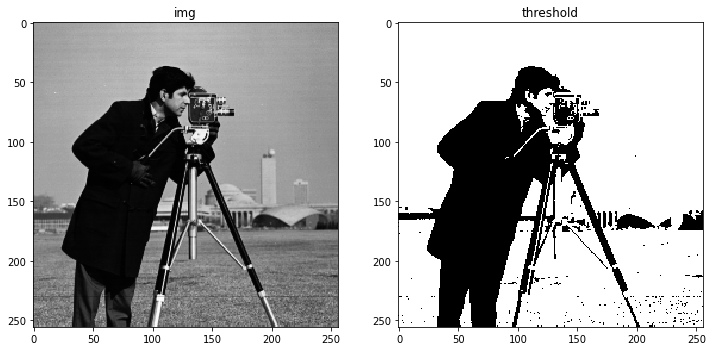

88.33186236247653


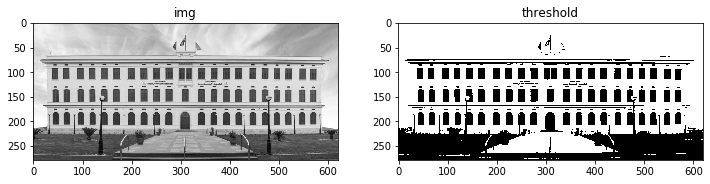

142.2129753895273


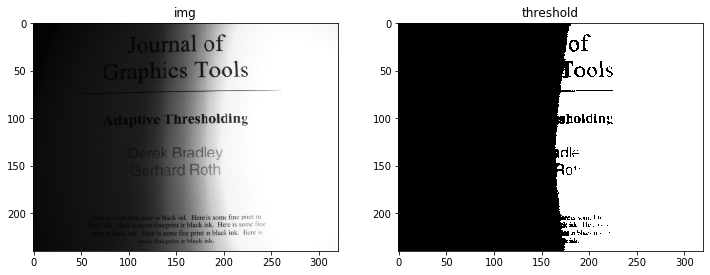

137.80805569499458


In [4]:
####################################################
img = io.imread('cameraman.png') #Gray
thr = getThreshold(img)
img_thr = img>thr
show_images((img,img_thr),("img","threshold"))
print(thr)
####################################################
img = io.imread('cufe.png') #RGB
img = rgb2gray(img)
img = (img * 255).astype(np.uint8)
thr = getThreshold(img)
img_thr = img>thr
show_images((img,img_thr),("img","threshold"))
print(thr)
####################################################
img = io.imread('book.png') #Gray
thr = getThreshold(img)
img_thr = img>thr
show_images((img,img_thr),("img","threshold"))
print(thr)

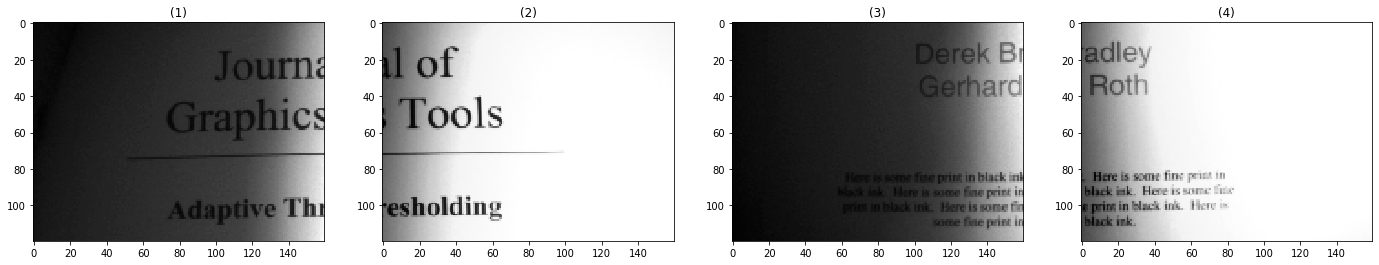

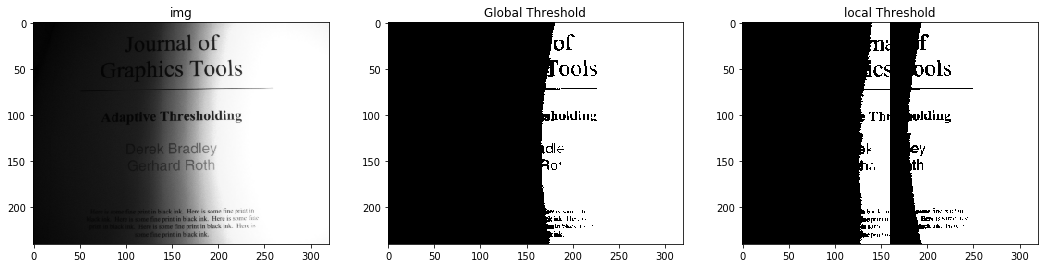

In [5]:
img = io.imread('book.png') #Gray
thr = getThreshold(img)
img_thr = img>thr
img1=[img[0:int(img.shape[0]/2),0:int(img.shape[1]/2)],
      img[0:int(img.shape[0]/2),int(img.shape[1]/2):int(img.shape[1])],
      img[int(img.shape[0]/2):int(img.shape[0]),0:int(img.shape[1]/2)],
      img[int(img.shape[0]/2):int(img.shape[0]),int(img.shape[1]/2):int(img.shape[1])]
     ]
show_images((img1[0],img1[1],img1[2],img1[3]))
for i in range(len(img1)):
    thr= getThreshold(img1[i])
    img1[i] = img1[i]>thr
    #print(thr)
    #show_images([img1[i]])
img_local=np.copy(img)
img_local[0:int(img.shape[0]/2),0:int(img.shape[1]/2)]=img1[0]
img_local[0:int(img.shape[0]/2),int(img.shape[1]/2):int(img.shape[1])]=img1[1]
img_local[int(img.shape[0]/2):int(img.shape[0]),0:int(img.shape[1]/2)]=img1[2]
img_local[int(img.shape[0]/2):int(img.shape[0]),int(img.shape[1]/2):int(img.shape[1])]=img1[3]

show_images((img,img_thr,img_local),("img","Global Threshold","local Threshold"))